In [1]:
import requests

url = "https://business.yelp.com/external-assets/files/Yelp-JSON.zip"
filename = "Yelp-JSON.zip"

# Adding a User-Agent header to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(url, stream=True, headers=headers)
response.raise_for_status() # Raise an exception for HTTP errors

with open(filename, 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

print(f"Downloaded {filename} successfully.")

Downloaded Yelp-JSON.zip successfully.


In [2]:
!unzip Yelp-JSON.zip
print("Extracted Yelp-JSON.zip successfully.")

Archive:  Yelp-JSON.zip
   creating: Yelp JSON/
  inflating: Yelp JSON/Yelp Dataset Documentation & ToS copy.pdf  
  inflating: __MACOSX/Yelp JSON/._Yelp Dataset Documentation & ToS copy.pdf  
  inflating: Yelp JSON/yelp_dataset.tar  
  inflating: __MACOSX/Yelp JSON/._yelp_dataset.tar  
Extracted Yelp-JSON.zip successfully.


In [3]:
!tar -xf "Yelp JSON/yelp_dataset.tar" -C .

In [4]:
!du -sh *

80K	Dataset_User_Agreement.pdf
16K	__MACOSX
55M	sample_data
114M	yelp_academic_dataset_business.json
274M	yelp_academic_dataset_checkin.json
5.0G	yelp_academic_dataset_review.json
173M	yelp_academic_dataset_tip.json
3.2G	yelp_academic_dataset_user.json
4.1G	Yelp JSON
4.1G	Yelp-JSON.zip


In [22]:
import pandas as pd
import os
import random
import io

# Redefine the paths to the JSON files (assuming they are in the current directory)
business_file = 'yelp_academic_dataset_business.json'
review_file = 'yelp_academic_dataset_review.json'
user_file = 'yelp_academic_dataset_user.json'

# Define sampling rates
sample_rate_business = 0.50 # 50% for business file
sample_rate_large = 0.10    # 10% for review and user files

# --- Re-Sample and Load DataFrames ---
print(f"Re-sampling and loading {business_file} with rate {sample_rate_business*100}%...")
sampled_business_lines = []
with open(business_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_business:
            sampled_business_lines.append(line)
df_business_sampled = pd.read_json(io.StringIO(''.join(sampled_business_lines)), lines=True)
print("df_business_sampled shape:", df_business_sampled.shape)

print(f"Re-sampling and loading {review_file} with rate {sample_rate_large*100}%...")
sampled_review_lines = []
with open(review_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_large:
            sampled_review_lines.append(line)
df_review_sampled = pd.read_json(io.StringIO(''.join(sampled_review_lines)), lines=True)
print("df_review_sampled shape:", df_review_sampled.shape)

print(f"Re-sampling and loading {user_file} with rate {sample_rate_large*100}%...")
sampled_user_lines = []
with open(user_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_large:
            sampled_user_lines.append(line)
df_user_sampled = pd.read_json(io.StringIO(''.join(sampled_user_lines)), lines=True)
print("df_user_sampled shape:", df_user_sampled.shape)

print("Sampled Yelp dataset files re-loaded into DataFrames successfully.")

# --- 1. Distribution of business ratings (stars) from df_business_sampled ---
print("\n--- 1. Distribution of business ratings (stars) from df_business_sampled ---")
dist_business_stars_sampled = df_business_sampled['stars'].value_counts().sort_index()
print("Distribution of Sampled Business Ratings:")
print(dist_business_stars_sampled)

# --- 2. Top 10 business categories by count from df_business_sampled ---
print("\n--- 2. Top 10 business categories by count from df_business_sampled ---")
# Filter out rows where 'categories' is None or NaN
df_business_sampled_clean_categories = df_business_sampled.dropna(subset=['categories'])

# Split categories string into a list of categories and then explode them into separate rows
all_categories_sampled = df_business_sampled_clean_categories['categories'].str.split(', ').explode()

# Count the occurrences of each category
category_counts_sampled = all_categories_sampled.value_counts()

# Get the top 10 most frequent categories
top_10_categories_sampled = category_counts_sampled.head(10)

print("Top 10 Sampled Business Categories:")
print(top_10_categories_sampled)

# --- 3. Distribution of review stars from df_review_sampled ---
print("\n--- 3. Distribution of review stars from df_review_sampled ---")
dist_review_stars_sampled = df_review_sampled['stars'].value_counts().sort_index()
print("Distribution of Sampled Review Stars:")
print(dist_review_stars_sampled)

# --- 4. Top 10 users by review count from df_user_sampled ---
print("\n--- 4. Top 10 users by review count from df_user_sampled ---")
top_10_users_by_review_count_sampled = df_user_sampled.sort_values(by='review_count', ascending=False).head(10)
print("Top 10 Sampled Users by Review Count:")
print(top_10_users_by_review_count_sampled[['name', 'review_count', 'average_stars']])

Re-sampling and loading yelp_academic_dataset_business.json with rate 50.0%...
df_business_sampled shape: (75083, 14)
Re-sampling and loading yelp_academic_dataset_review.json with rate 10.0%...
df_review_sampled shape: (699776, 9)
Re-sampling and loading yelp_academic_dataset_user.json with rate 10.0%...
df_user_sampled shape: (198561, 22)
Sampled Yelp dataset files re-loaded into DataFrames successfully.

--- 1. Distribution of business ratings (stars) from df_business_sampled ---
Distribution of Sampled Business Ratings:
stars
1.0     1027
1.5     2494
2.0     4710
2.5     7102
3.0     9198
3.5    13356
4.0    15325
4.5    13709
5.0     8162
Name: count, dtype: int64

--- 2. Top 10 business categories by count from df_business_sampled ---
Top 10 Sampled Business Categories:
categories
Restaurants         26145
Food                13858
Shopping            12241
Home Services        7133
Beauty & Spas        7123
Nightlife            6019
Health & Medical     6000
Local Services     


--- 1. Distribution of business ratings (stars) from df_business ---
Distribution of Business Ratings:
stars
1.0     1027
1.5     2494
2.0     4710
2.5     7102
3.0     9198
3.5    13356
4.0    15325
4.5    13709
5.0     8162
Name: count, dtype: int64

--- 2. Top 10 business categories by count from df_business ---
Top 10 Business Categories:
categories
Restaurants         26145
Food                13858
Shopping            12241
Home Services        7133
Beauty & Spas        7123
Nightlife            6019
Health & Medical     6000
Local Services       5529
Bars                 5414
Automotive           5380
Name: count, dtype: int64

--- 3. Distribution of review stars from df_review ---
Distribution of Review Stars:
stars
1    107047
2     54739
3     69133
4    145679
5    323178
Name: count, dtype: int64

--- 4. Top 10 users by review count from df_user ---
Top 10 Users by Review Count:
          name  review_count  average_stars
1761       Fox         17473           3.77
407    

/tmp/ipython-input-148325016.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_business['stars'], palette='viridis')


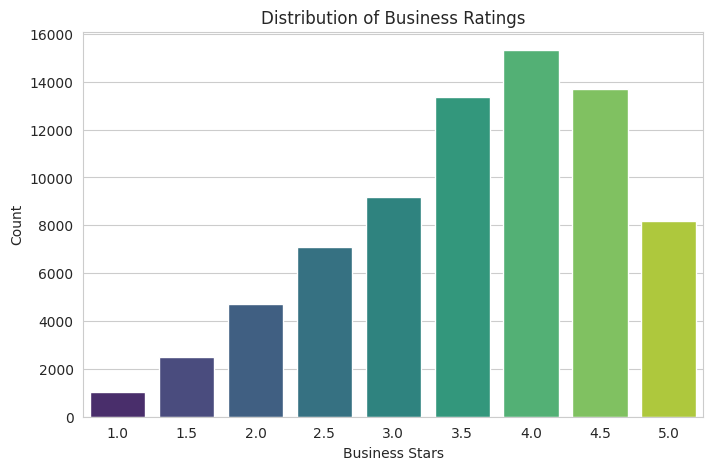

/tmp/ipython-input-148325016.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='mako')


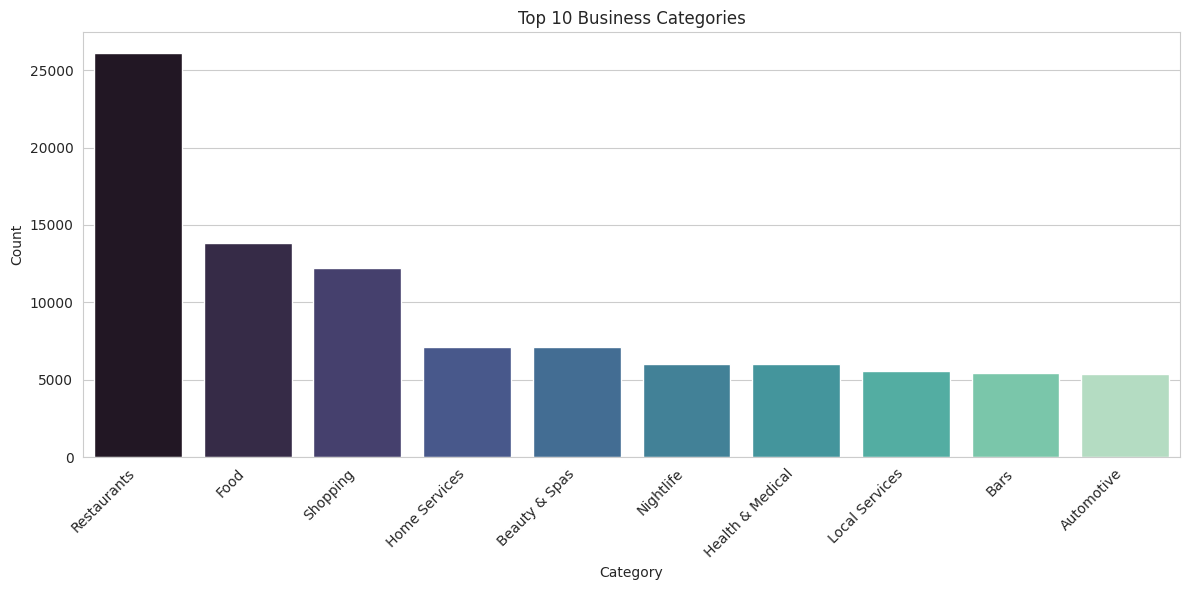

/tmp/ipython-input-148325016.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_review['stars'], palette='magma')


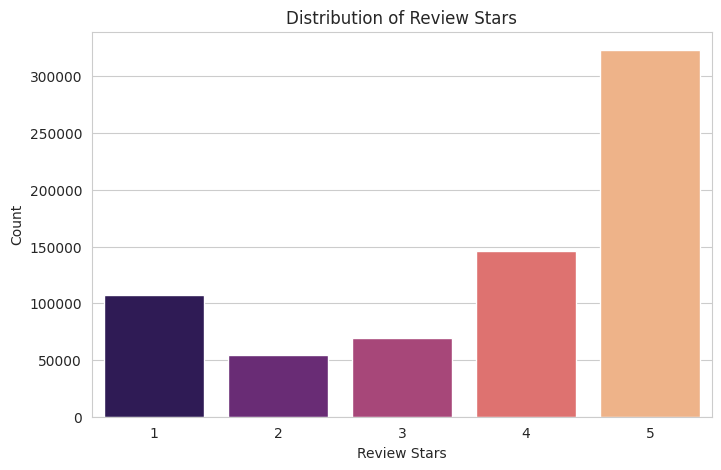

/tmp/ipython-input-148325016.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_users_by_review_count['name'], y=top_10_users_by_review_count['review_count'], palette='rocket')


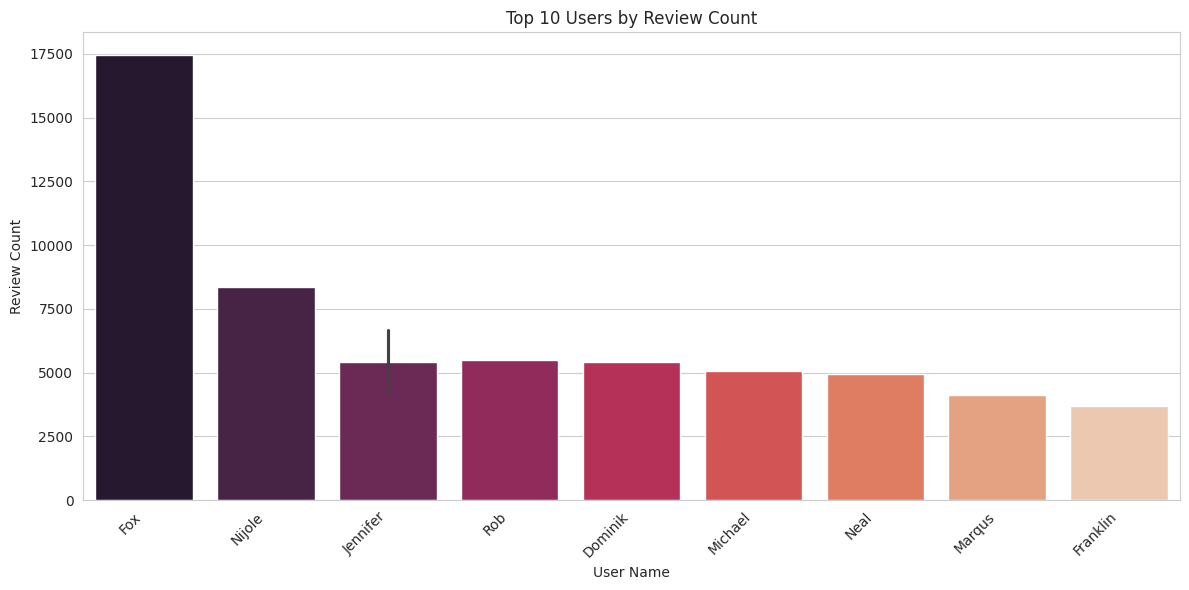

Visualizations generated successfully.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# # Redefine the paths to the JSON files (assuming they are in the current directory)
# business_file = 'yelp_academic_dataset_business.json'
# review_file = 'yelp_academic_dataset_review.json'
# user_file = 'yelp_academic_dataset_user.json'

# # Re-load the business data
# print(f"\nLoading {business_file}...")
# df_business = pd.read_json(business_file, lines=True)
# print("df_business shape:", df_business.shape)

# # Re-load the review data
# print(f"\nLoading {review_file}...")
# df_review = pd.read_json(review_file, lines=True)
# print("df_review shape:", df_review.shape)

# # Re-load the user data
# print(f"\nLoading {user_file}...")
# df_user = pd.read_json(user_file, lines=True)
# print("df_user shape:", df_user.shape)

# print("All primary Yelp dataset JSON files loaded into DataFrames successfully.")

df_review=df_review_sampled
df_business=df_business_sampled
df_user=df_user_sampled
# --- 1. Distribution of business ratings (stars) from df_business ---
print("\n--- 1. Distribution of business ratings (stars) from df_business ---")
dist_business_stars = df_business['stars'].value_counts().sort_index()
print("Distribution of Business Ratings:")
print(dist_business_stars)

# --- 2. Top 10 business categories by count from df_business ---
print("\n--- 2. Top 10 business categories by count from df_business ---")
# Filter out rows where 'categories' is None or NaN
df_business_clean_categories = df_business.dropna(subset=['categories'])

# Split categories string into a list of categories and then explode them into separate rows
all_categories = df_business_clean_categories['categories'].str.split(', ').explode()

# Count the occurrences of each category
category_counts = all_categories.value_counts()

# Get the top 10 most frequent categories
top_10_categories = category_counts.head(10)

print("Top 10 Business Categories:")
print(top_10_categories)

# --- 3. Distribution of review stars from df_review ---
print("\n--- 3. Distribution of review stars from df_review ---")
dist_review_stars = df_review['stars'].value_counts().sort_index()
print("Distribution of Review Stars:")
print(dist_review_stars)

# --- 4. Top 10 users by review count from df_user ---
print("\n--- 4. Top 10 users by review count from df_user ---")
top_10_users_by_review_count = df_user.sort_values(by='review_count', ascending=False).head(10)
print("Top 10 Users by Review Count:")
print(top_10_users_by_review_count[['name', 'review_count', 'average_stars']])

# Set plot style
sns.set_style("whitegrid")

# 1. Visualize the distribution of business ratings
plt.figure(figsize=(8, 5))
sns.countplot(x=df_business['stars'], palette='viridis')
plt.title('Distribution of Business Ratings')
plt.xlabel('Business Stars')
plt.ylabel('Count')
plt.show()

# 2. Visualize the top 10 business categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='mako')
plt.title('Top 10 Business Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Visualize the distribution of review stars
plt.figure(figsize=(8, 5))
sns.countplot(x=df_review['stars'], palette='magma')
plt.title('Distribution of Review Stars')
plt.xlabel('Review Stars')
plt.ylabel('Count')
plt.show()

# 4. Visualize the top 10 users by review count
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_users_by_review_count['name'], y=top_10_users_by_review_count['review_count'], palette='rocket')
plt.title('Top 10 Users by Review Count')
plt.xlabel('User Name')
plt.ylabel('Review Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Visualizations generated successfully.")

=== Scenario 1: Line Chart - User Activity Trend ===


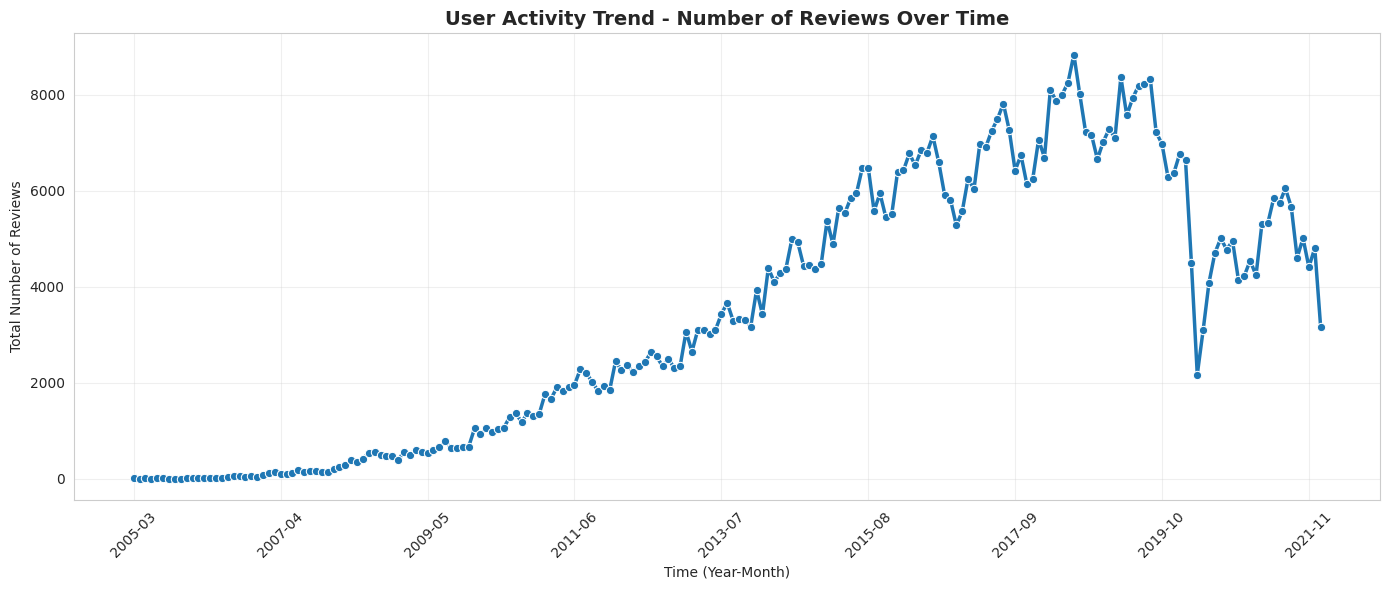

Time period covered: 2005-03 to 2022-01
Total months in dataset: 203
Average reviews per month: 3437


In [7]:
# Scenario 1: Line Chart - User Activity Trend
print("=== Scenario 1: Line Chart - User Activity Trend ===")

# Convert date column to datetime
df_review['date'] = pd.to_datetime(df_review['date'])

# Group by year-month and count reviews
monthly_reviews = df_review.groupby(df_review['date'].dt.to_period('M')).size().reset_index(name='review_count')
monthly_reviews['date_str'] = monthly_reviews['date'].astype(str)

# Create line plot with better x-axis formatting
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_reviews, x='date_str', y='review_count', marker='o', linewidth=2.5)
plt.title('User Activity Trend - Number of Reviews Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Total Number of Reviews')

# Improve x-axis readability - show approximately 8 labels
n = len(monthly_reviews)
step = max(1, n // 8)
plt.xticks(range(0, n, step), monthly_reviews['date_str'].iloc[range(0, n, step)], rotation=45)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Statistics
print(f"Time period covered: {monthly_reviews['date_str'].iloc[0]} to {monthly_reviews['date_str'].iloc[-1]}")
print(f"Total months in dataset: {len(monthly_reviews)}")
print(f"Average reviews per month: {monthly_reviews['review_count'].mean():.0f}")


=== Scenario 2: Scatter Plot - Popularity vs Quality ===


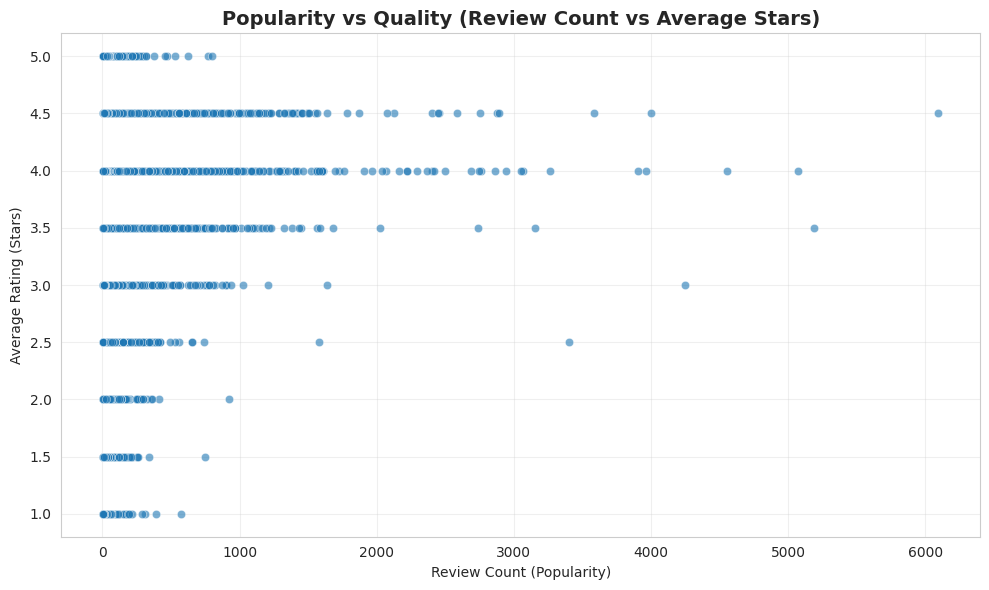

Number of businesses plotted: 75157
Average Stars: 3.6
Average Review Count: 45.15


In [8]:
# === Scenario 2: Scatter Plot - Popularity vs Quality ===
print("=== Scenario 2: Scatter Plot - Popularity vs Quality ===")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_business,
    x='review_count',
    y='stars',
    alpha=0.6
)

plt.title("Popularity vs Quality (Review Count vs Average Stars)", fontsize=14, fontweight='bold')
plt.xlabel("Review Count (Popularity)")
plt.ylabel("Average Rating (Stars)")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optional Stats (like friend)
print("Number of businesses plotted:", df_business.shape[0])
print("Average Stars:", round(df_business['stars'].mean(), 2))
print("Average Review Count:", round(df_business['review_count'].mean(), 2))


=== Scenario 3: Rel Plot - Comparing Phoenix vs Charlotte ===


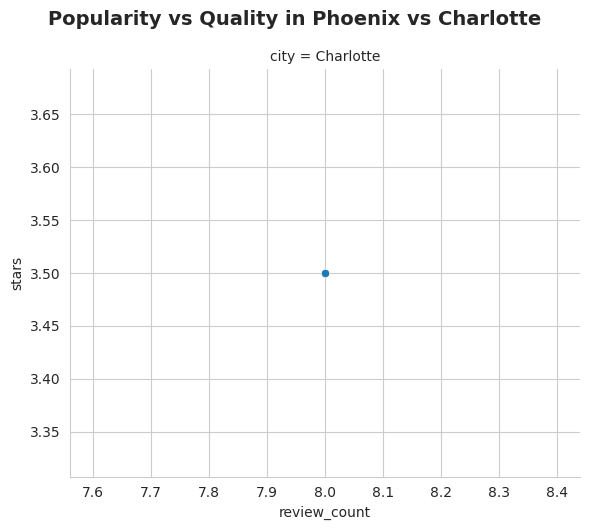

Rows per city:
city
Charlotte    1
Name: count, dtype: int64


In [10]:
# === Scenario 3: Rel Plot - Comparing Two Cities ===
print("=== Scenario 3: Rel Plot - Comparing Phoenix vs Charlotte ===")

# Step 1 — Select the two cities
cities_to_compare = ["Phoenix", "Charlotte"]

df_two_cities = df_business[df_business['city'].isin(cities_to_compare)]

# Step 2 — Ensure needed columns exist
df_two_cities = df_two_cities[['city', 'review_count', 'stars']].dropna()

# Step 3 — Relplot with kind=scatter
sns.relplot(
    data=df_two_cities,
    x="review_count",
    y="stars",
    col="city",
    kind="scatter",
    height=5,
    aspect=1.2
)

plt.suptitle("Popularity vs Quality in Phoenix vs Charlotte", y=1.05, fontsize=14, fontweight='bold')
plt.show()

# Optional stats
print("Rows per city:")
print(df_two_cities['city'].value_counts())


=== Scenario 4: Bar Plot - Quality Comparison by Price Range ===


/tmp/ipython-input-3543513653.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


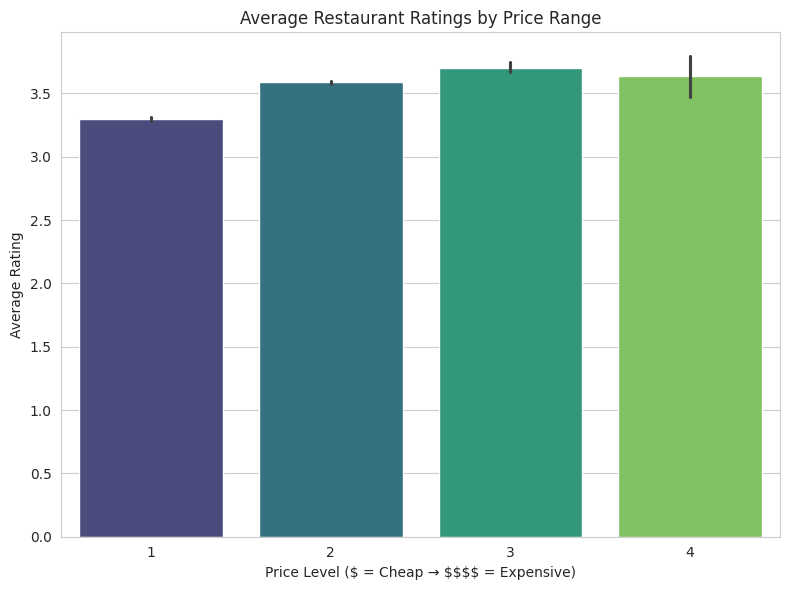

In [16]:
# Scenario 4: Bar Plot - Quality Comparison by Price Range
print("=== Scenario 4: Bar Plot - Quality Comparison by Price Range ===")

# Filter restaurants based on categories (corrected string matching)
restaurants = df_business[df_business['categories'].str.contains('Restaurants', na=False, case=False)]

# Make sure attributes column exists
restaurants = restaurants.dropna(subset=['attributes'])

# Extract price range from attributes (same function you used)
def extract_price(attr):
    if isinstance(attr, dict) and 'RestaurantsPriceRange2' in attr:
        return attr['RestaurantsPriceRange2']
    return None

restaurants['price_range'] = restaurants['attributes'].apply(extract_price)

# Drop rows with no price info
restaurants = restaurants.dropna(subset=['price_range'])

# Convert numeric price levels to strings (as your order expects)
restaurants['price_range'] = restaurants['price_range'].astype(str)

# Draw corrected bar plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=restaurants,
    x='price_range',
    y='stars',
    order=['1', '2', '3', '4'],   # your original order kept
    palette='viridis'
)

plt.title('Average Restaurant Ratings by Price Range')
plt.xlabel('Price Level ($ = Cheap → $$$$ = Expensive)')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


=== Scenario 5: Count Plot - Distribution of User Review Stars ===


/tmp/ipython-input-2576981166.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


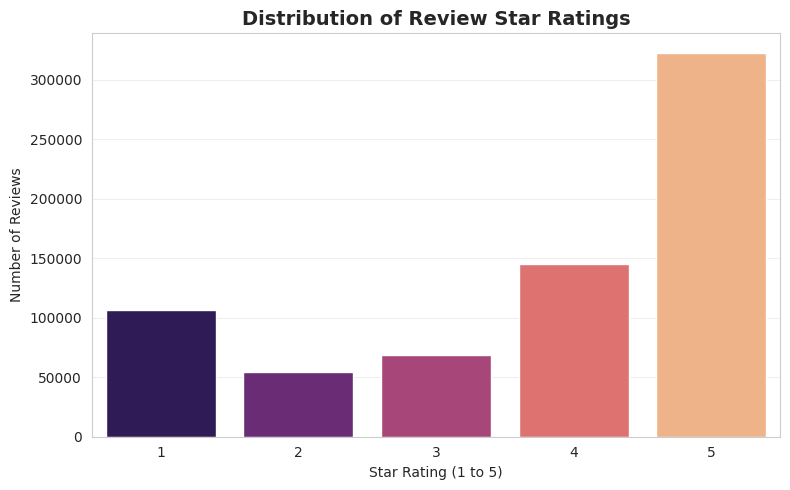

Star count summary:
stars
1    106739
2     54372
3     68627
4    145206
5    322803
Name: count, dtype: int64


In [17]:
# === Scenario 5: Count Plot - Distribution of User Review Stars ===
print("=== Scenario 5: Count Plot - Distribution of User Review Stars ===")

# Ensure stars column exists
df_review = df_review.dropna(subset=['stars'])

# Plot count of star ratings
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_review,
    x='stars',
    palette='magma',
    order=sorted(df_review['stars'].unique())   # ensures 1→5 order
)

plt.title('Distribution of Review Star Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Star Rating (1 to 5)')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print optional statistics
print("Star count summary:")
print(df_review['stars'].value_counts().sort_index())


=== Scenario 6: Cat Plot - Rating Distribution Across Food Categories ===


/tmp/ipython-input-2430055603.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


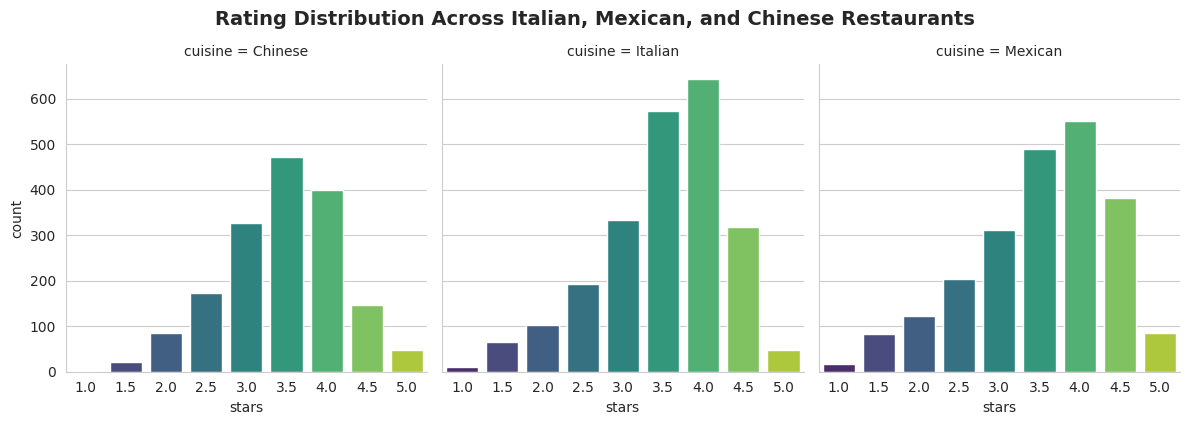

cuisine  stars
Chinese  3.5      471
         4.0      400
         3.0      327
         2.5      173
         4.5      146
         2.0       86
         5.0       47
         1.5       22
         1.0        1
Italian  4.0      643
         3.5      573
         3.0      333
         4.5      317
         2.5      193
         2.0      103
         1.5       65
         5.0       47
         1.0       11
Mexican  4.0      551
         3.5      490
         4.5      382
         3.0      312
         2.5      204
         2.0      123
         5.0       86
         1.5       83
         1.0       18
Name: count, dtype: int64


In [18]:
# === Scenario 6: Cat Plot - Rating Distribution Across Food Categories ===
print("=== Scenario 6: Cat Plot - Rating Distribution Across Food Categories ===")

# Ensure we are using sampled business dataset
df_business = df_business_sampled

# Step 1 — Filter only rows with categories
df_cuis = df_business.dropna(subset=['categories'])

# Step 2 — Keep only Italian, Mexican, and Chinese restaurants
target_cuisines = ["Italian", "Mexican", "Chinese"]
pattern = "|".join(target_cuisines)

df_cuis = df_cuis[df_cuis['categories'].str.contains(pattern, case=False, na=False)]

# Step 3 — Assign proper cuisine label
def detect_cuisine(cat_text):
    cat_text = str(cat_text)
    for c in target_cuisines:
        if c.lower() in cat_text.lower():
            return c
    return None

df_cuis['cuisine'] = df_cuis['categories'].apply(detect_cuisine)

# Step 4 — Keep stars and cuisine columns
df_plot = df_cuis[['cuisine', 'stars']].dropna()

# Step 5 — Draw Catplot (multiple countplots)
sns.catplot(
    data=df_plot,
    x='stars',
    col='cuisine',
    kind='count',
    col_wrap=3,
    height=4,
    aspect=1,
    palette='viridis'
)

plt.suptitle("Rating Distribution Across Italian, Mexican, and Chinese Restaurants",
             y=1.05, fontsize=14, fontweight='bold')
plt.show()

# Optional stats
print(df_plot.groupby('cuisine')['stars'].value_counts())


=== Scenario 7: Dist Plot - Distribution of User Activity ===


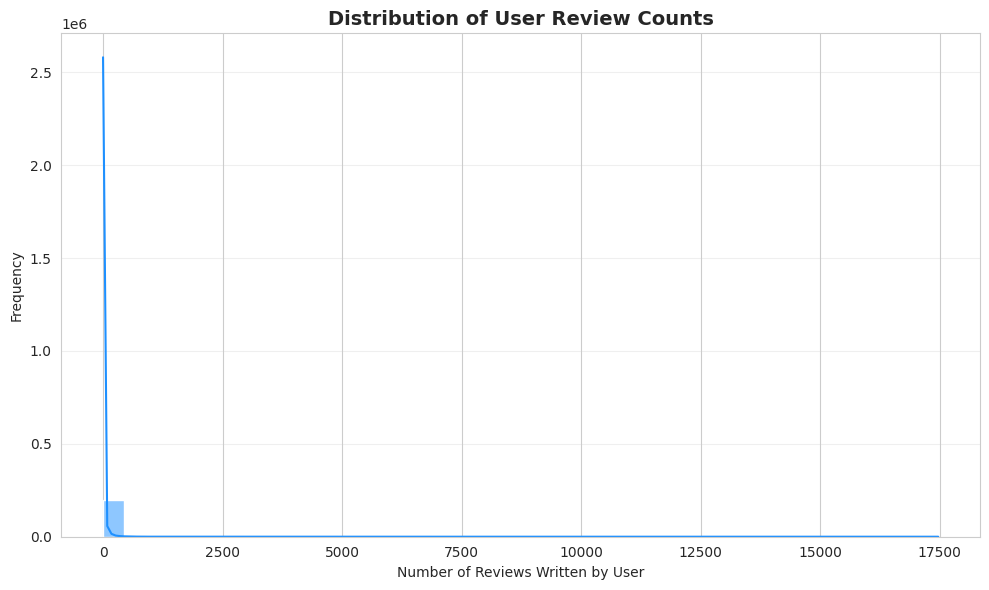

Number of users: 198561
Average review_count: 23.478412175603466
Max review_count in sample: 17473


In [24]:
# === Scenario 7: Dist Plot - Distribution of User Activity ===
print("=== Scenario 7: Dist Plot - Distribution of User Activity ===")

# Use sampled dataset (important for Colab)
df_user = df_user_sampled.copy()

# Remove missing values
df_user = df_user.dropna(subset=['review_count'])

# Draw histogram + KDE (replacement for distplot)
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_user,
    x='review_count',
    kde=True,
    bins=40,
    color='dodgerblue'
)

plt.title("Distribution of User Review Counts", fontsize=14, fontweight='bold')
plt.xlabel("Number of Reviews Written by User")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: print stats
print("Number of users:", len(df_user))
print("Average review_count:", df_user['review_count'].mean())
print("Max review_count in sample:", df_user['review_count'].max())


=== Scenario 8: KDE Plot - Density Distribution of Business Ratings ===


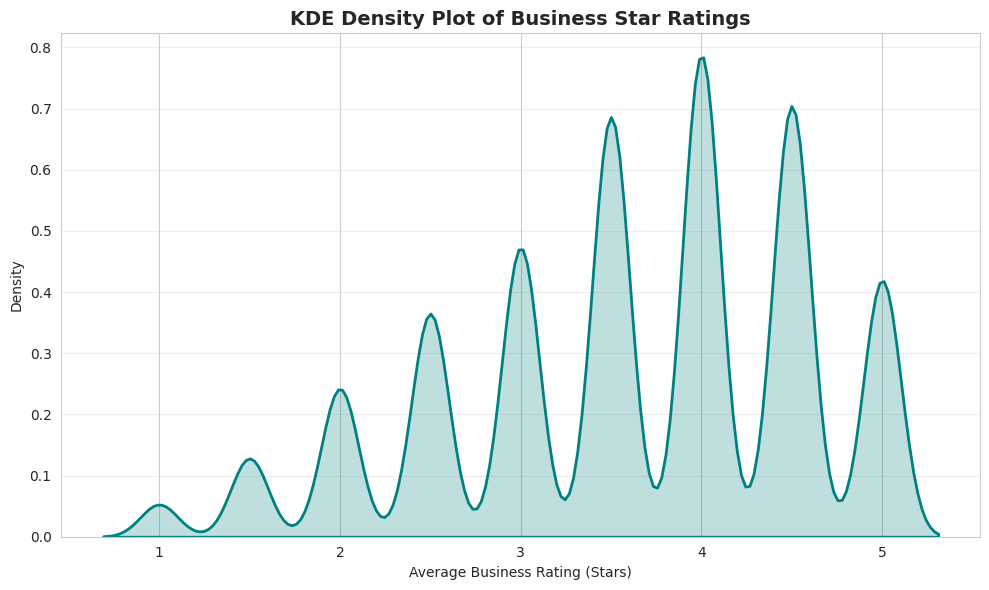

Mean stars: 3.5971325066925934
Most common rating: 4.0


In [25]:
# === Scenario 8: KDE Plot - Density Distribution of Business Ratings ===
print("=== Scenario 8: KDE Plot - Density Distribution of Business Ratings ===")

# Ensure dataset
df_business = df_business_sampled.copy()

# Drop missing star values
df_stars = df_business['stars'].dropna()

# Draw KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_business,
    x='stars',
    fill=True,         # fill under the curve
    linewidth=2,
    color='teal'
)

plt.title("KDE Density Plot of Business Star Ratings", fontsize=14, fontweight='bold')
plt.xlabel("Average Business Rating (Stars)")
plt.ylabel("Density")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Optional stats
print("Mean stars:", df_stars.mean())
print("Most common rating:", df_stars.mode()[0])


=== Scenario 9: Swarm Plot - Rating Distribution Across Business Categories ===


/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 43.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


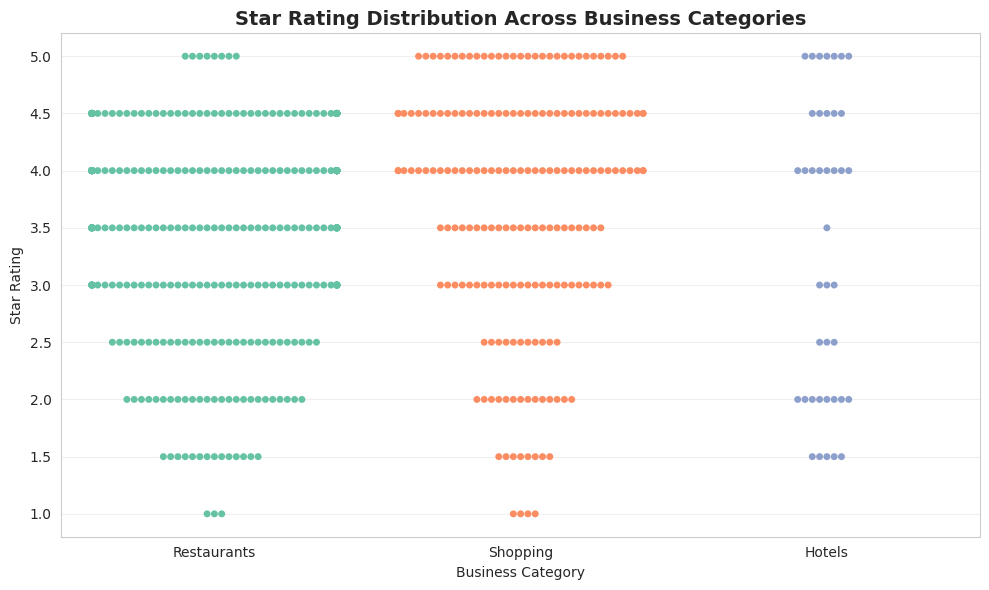

✓ Swarm plot created with 600 sampled points (no crash).


In [27]:
# === Scenario 9: Swarm Plot - Rating Distribution Across Business Categories ===
print("=== Scenario 9: Swarm Plot - Rating Distribution Across Business Categories ===")

# Use sampled dataset
df_business = df_business_sampled.copy()

# Step 1 — Drop rows without categories
df_cat = df_business.dropna(subset=['categories'])

# Step 2 — Select top business types
target_categories = ["Restaurants", "Shopping", "Hotels"]
pattern = "|".join(target_categories)
df_cat = df_cat[df_cat['categories'].str.contains(pattern, case=False, na=False)]

# Step 3 — Detect category label
def detect_category(cat_text):
    cat_text = str(cat_text)
    for c in target_categories:
        if c.lower() in cat_text.lower():
            return c
    return None

df_cat['category_label'] = df_cat['categories'].apply(detect_category)

# Step 4 — Final dataset
df_plot = df_cat[['category_label', 'stars']].dropna()

# Step 5 — Take small sample for swarmplot (avoid crash!)
df_plot_small = df_plot.sample(n=600, random_state=42)   # 600 points only

# Step 6 — Draw swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(
    data=df_plot_small,
    x='category_label',
    y='stars',
    hue='category_label',   # fixes palette warning
    palette='Set2',
    dodge=False,
    legend=False
)

plt.title("Star Rating Distribution Across Business Categories", fontsize=14, fontweight='bold')
plt.xlabel("Business Category")
plt.ylabel("Star Rating")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Swarm plot created with 600 sampled points (no crash).")


=== Scenario 10: Strip Plot - Rating Distribution Across Cities ===


/tmp/ipython-input-2231107219.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


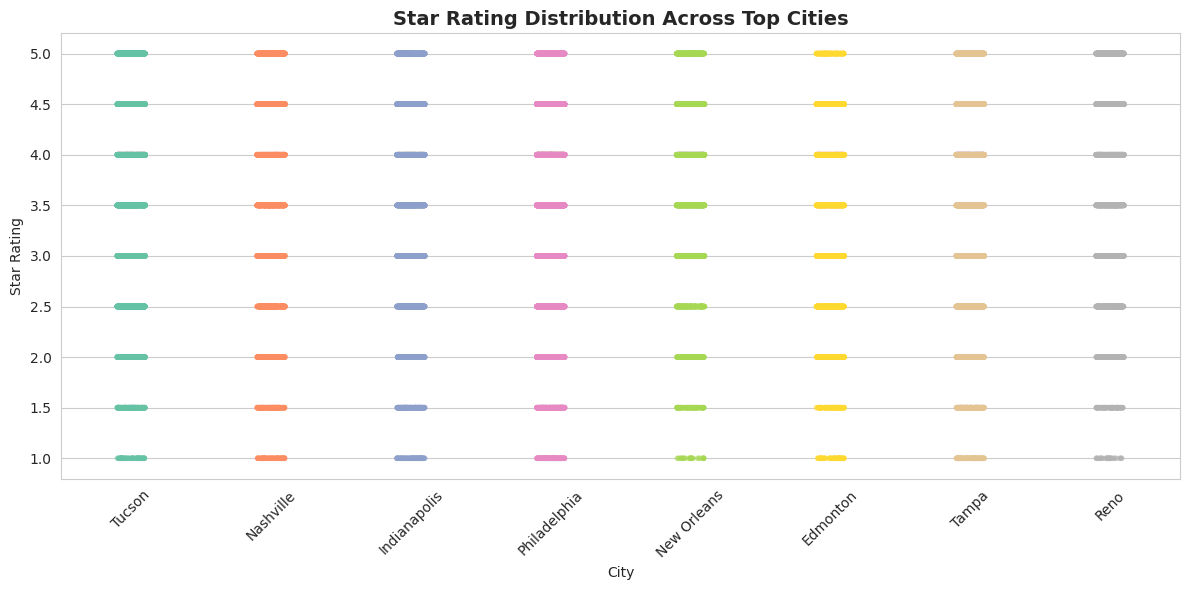

In [30]:
# === Scenario 10: Strip Plot - Rating Distribution Across Top Cities ===
print("=== Scenario 10: Strip Plot - Rating Distribution Across Cities ===")

# Use sampled dataset
df_business = df_business_sampled.copy()

# Step 1 — Select top 8 cities with most businesses
top_cities = df_business['city'].value_counts().head(8).index.tolist()

# Step 2 — Filter dataset for only these cities
df_plot = df_business[df_business['city'].isin(top_cities)]

# Step 3 — Draw strip plot
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df_plot,
    x='city',
    y='stars',
    jitter=True,
    alpha=0.7,
    size=4,
    palette='Set2'
)

plt.title("Star Rating Distribution Across Top Cities", fontsize=14, fontweight='bold')
plt.xlabel("City")
plt.ylabel("Star Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


=== Scenario 11: Box Plot - Popularity Distribution across Business Categories ===


/tmp/ipython-input-635992066.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


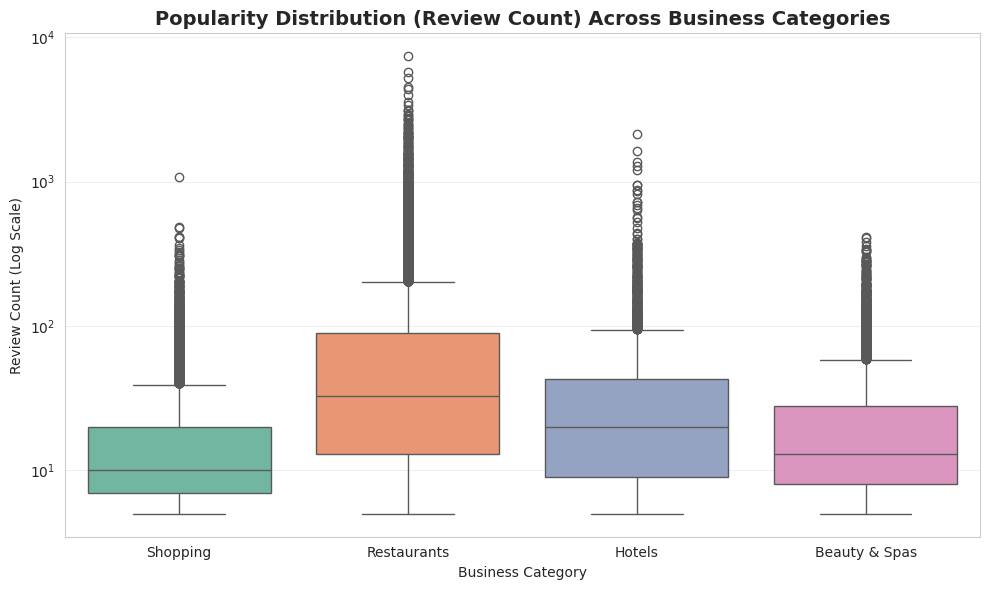

                 count       mean         std  min   25%   50%   75%     max
category                                                                    
Beauty & Spas   6100.0  25.070820   34.394387  5.0   8.0  13.0  28.0   416.0
Hotels          2648.0  46.194486  100.712627  5.0   9.0  20.0  43.0  2149.0
Restaurants    26145.0  87.321209  186.967931  5.0  13.0  33.0  89.0  7400.0
Shopping       11927.0  18.461558   27.490257  5.0   7.0  10.0  20.0  1074.0


In [32]:
# === Scenario 11: Box Plot - Popularity Distribution across Business Categories ===
print("=== Scenario 11: Box Plot - Popularity Distribution across Business Categories ===")

# Use sampled business dataset
df_business = df_business_sampled.copy()

# Step 1 — Define the target categories
target_categories = ['Restaurants', 'Shopping', 'Hotels', 'Beauty & Spas']

# Step 2 — Detect which category each business belongs to
def get_business_category(cats, target_categories):
    """
    Returns the first matched category from target_categories
    """
    if pd.isna(cats):
        return None
    cats_str = str(cats).lower()
    for cat in target_categories:
        if cat.lower() in cats_str:
            return cat
    return None

# Step 3 — Apply category detection
df_cat = df_business.copy()
df_cat['category'] = df_cat['categories'].apply(lambda x: get_business_category(x, target_categories))

# Remove rows without identified category
df_cat = df_cat.dropna(subset=['category'])

# Step 4 — Plot the Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_cat,
    x='category',
    y='review_count',
    palette='Set2'
)

# Log scale for better visibility (due to large outliers)
plt.yscale('log')

plt.title("Popularity Distribution (Review Count) Across Business Categories", fontsize=14, fontweight='bold')
plt.xlabel("Business Category")
plt.ylabel("Review Count (Log Scale)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: show detailed stats
print(df_cat.groupby('category')['review_count'].describe())


=== Scenario 12: Pair Plot - Relationships Between User Features ===


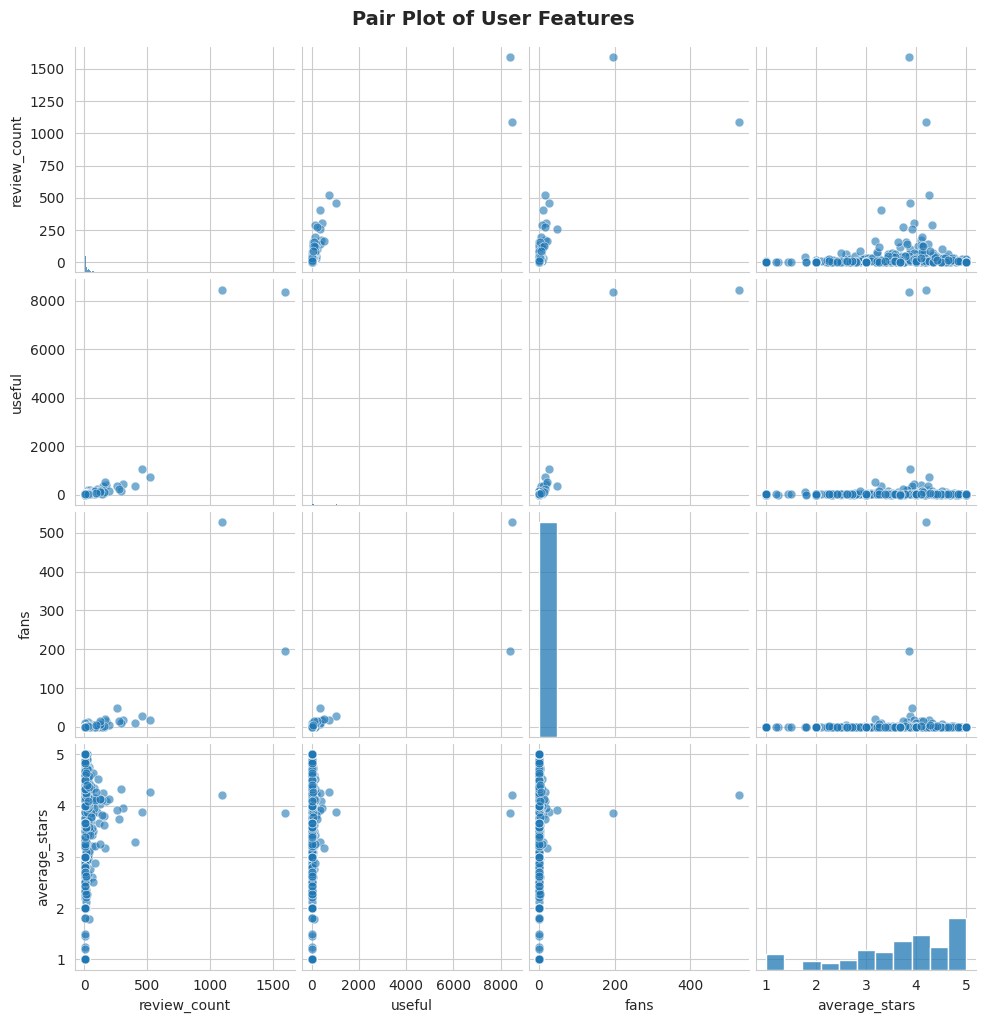

Used rows: 600
       review_count       useful        fans  average_stars
count    600.000000   600.000000  600.000000     600.000000
mean      22.970000    47.555000    1.893333       3.688333
std       90.320108   489.855694   23.136280       1.133863
min        1.000000     0.000000    0.000000       1.000000
25%        2.000000     0.000000    0.000000       3.000000
50%        5.000000     3.000000    0.000000       3.920000
75%       15.000000    12.000000    0.000000       4.592500
max     1591.000000  8471.000000  528.000000       5.000000


In [33]:
# === Scenario 12: Pair Plot - Relationships Between User Features ===
print("=== Scenario 12: Pair Plot - Relationships Between User Features ===")

# Use sampled dataset
df_user = df_user_sampled.copy()

# Step 1 — Select 4 required numeric features
selected_columns = ['review_count', 'useful', 'fans', 'average_stars']

# Step 2 — Remove missing values
df_user_clean = df_user[selected_columns].dropna()

# Step 3 — To avoid crash, take a reasonable sample
df_user_small = df_user_clean.sample(n=min(600, len(df_user_clean)), random_state=42)

# Step 4 — Draw Pair Plot
sns.pairplot(
    df_user_small,
    diag_kind='hist',   # histogram on diagonal
    plot_kws={'alpha': 0.6, 's': 40},  # nicer scatter points
)

plt.suptitle("Pair Plot of User Features", y=1.02, fontsize=14, fontweight='bold')
plt.show()

# Optional summary
print("Used rows:", len(df_user_small))
print(df_user_small.describe())


=== Scenario 13: Reg Plot - Linear Relationship Between Popularity and Quality ===


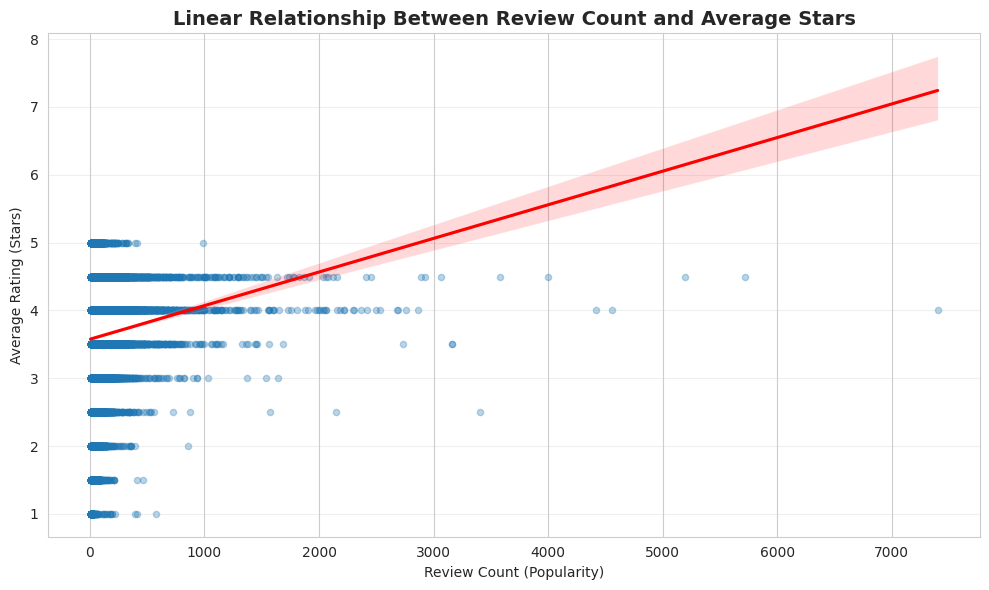

Correlation: 0.06096131306968946
Rows used: 75083


In [34]:
# === Scenario 13: Reg Plot - Linear Relationship Between Popularity and Quality ===
print("=== Scenario 13: Reg Plot - Linear Relationship Between Popularity and Quality ===")

# Use sampled dataset
df_business = df_business_sampled.copy()

# Keep necessary columns
df_plot = df_business[['review_count', 'stars']].dropna()

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_plot,
    x='review_count',
    y='stars',
    scatter_kws={'alpha': 0.3, 's': 20},
    line_kws={'color': 'red'}
)

plt.title("Linear Relationship Between Review Count and Average Stars", fontsize=14, fontweight='bold')
plt.xlabel("Review Count (Popularity)")
plt.ylabel("Average Rating (Stars)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Optional Stats
print("Correlation:", df_plot['review_count'].corr(df_plot['stars']))
print("Rows used:", len(df_plot))


=== Scenario 14: Joint Plot - Popularity vs Quality with Marginal Histograms ===


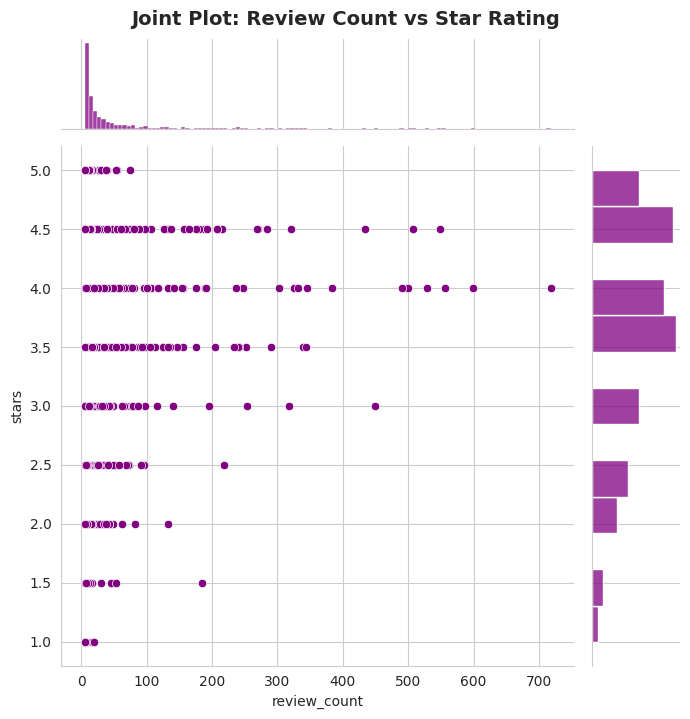

Sample size: 800
Correlation: 0.07491294107246303


In [35]:
# === Scenario 14: Joint Plot - Popularity vs Quality with Marginal Histograms ===
print("=== Scenario 14: Joint Plot - Popularity vs Quality with Marginal Histograms ===")

# Use sampled dataset
df_business = df_business_sampled.copy()

# Keep required columns
df_plot = df_business[['review_count', 'stars']].dropna()

# Take a small sample to speed up (jointplot is heavy)
df_plot_small = df_plot.sample(n=min(800, len(df_plot)), random_state=42)

# Draw Joint Plot
sns.jointplot(
    data=df_plot_small,
    x='review_count',
    y='stars',
    kind='scatter',
    height=7,
    color='purple'
)

plt.suptitle("Joint Plot: Review Count vs Star Rating", y=1.02, fontsize=14, fontweight='bold')
plt.show()

# Optional Stats
print("Sample size:", len(df_plot_small))
print("Correlation:", df_plot_small['review_count'].corr(df_plot_small['stars']))


=== Scenario 15: Heat Map - Correlation Matrix of User Features ===


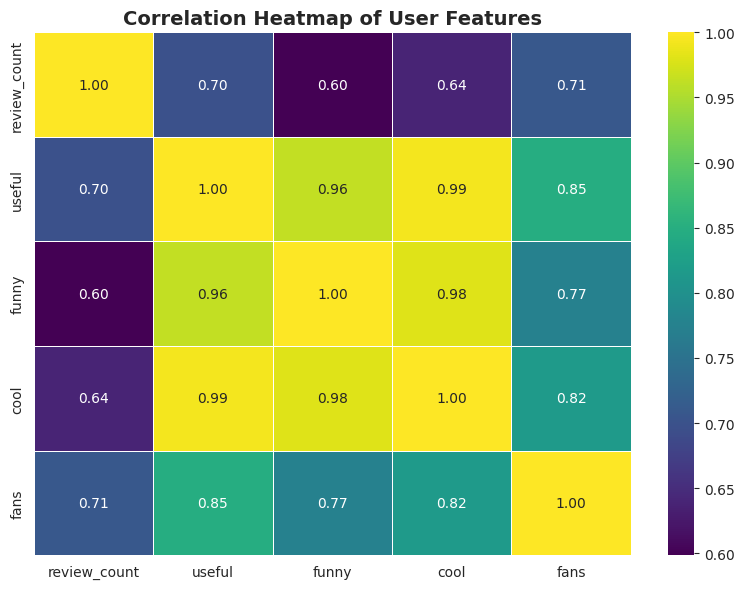

Correlation Matrix:
              review_count    useful     funny      cool      fans
review_count      1.000000  0.698239  0.598571  0.637880  0.706882
useful            0.698239  1.000000  0.962650  0.993019  0.846937
funny             0.598571  0.962650  1.000000  0.980306  0.773166
cool              0.637880  0.993019  0.980306  1.000000  0.815404
fans              0.706882  0.846937  0.773166  0.815404  1.000000


In [40]:
# === Scenario 15: Heat Map - Correlation Matrix of User Features ===
print("=== Scenario 15: Heat Map - Correlation Matrix of User Features ===")

# Use sampled user dataset
df_user = df_user_sampled.copy()

# Step 1 — Select the required numeric columns
selected_cols = ['review_count', 'useful', 'funny', 'cool', 'fans']

# Step 2 — Drop rows with missing values
df_user_clean = df_user[selected_cols].dropna()

# Step 3 — Compute correlation matrix
corr_matrix = df_user_clean.corr()

# Step 4 — Draw Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='viridis',
    linewidths=0.5,
    fmt=".2f"
)

plt.title("Correlation Heatmap of User Features", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Optional: print raw matrix
print("Correlation Matrix:")
print(corr_matrix)
